# T-test

Imagine you are a data scientist at a company that manufactures light bulbs. The production team claims that the average lifespan of their new light bulbs is 1500 hours. However, you suspect that the actual average lifespan is different. To test this, you take a random sample of 20 light bulbs and measure their lifespans.

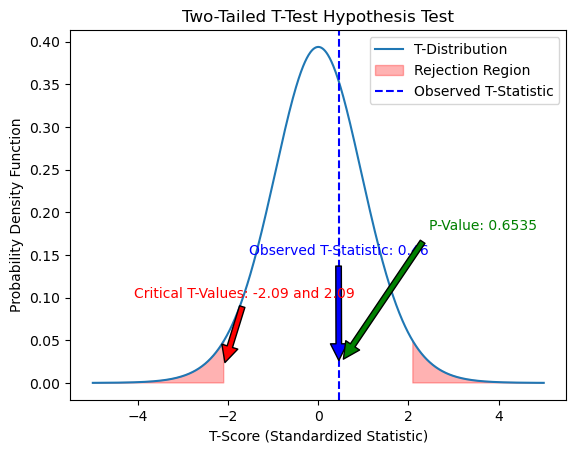

Fail to reject the null hypothesis: There is not enough evidence to conclude that the average lifespan is different from 1500 hours.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Null Hypothesis (H0): The true mean lifespan (μ) is equal to 1500 hours.
# Alternative Hypothesis (H1): The true mean lifespan (μ) is not equal to 1500 hours.

# Given data
sample_lifespans = np.array([1480, 1515, 1490, 1502, 1488, 1505, 1512, 1498, 1485, 1505,
                             1520, 1492, 1508, 1496, 1510, 1495, 1502, 1498, 1506, 1515])

# Hypothesized mean
hypothesized_mean = 1500

# Calculate the T-Statistic
t_statistic, p_value = stats.ttest_1samp(sample_lifespans, hypothesized_mean)

# Determine Critical Values
alpha = 0.05
t_critical_upper = stats.t.ppf(1 - alpha/2, df=len(sample_lifespans)-1)
t_critical_lower = -t_critical_upper

# Generate data for the t-distribution
x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, df=len(sample_lifespans)-1)

# Plot the t-distribution
plt.plot(x, y, label='T-Distribution')

# Shade the rejection regions for a two-tailed test
plt.fill_between(x, y, where=(x < t_critical_lower) | (x > t_critical_upper),
                 color='red', alpha=0.3, label='Rejection Region')

# Plot the observed t-statistic
plt.axvline(x=t_statistic, color='blue', linestyle='--', label='Observed T-Statistic')

# Add labels and title
plt.title('Two-Tailed T-Test Hypothesis Test')
plt.xlabel('T-Score (Standardized Statistic)')
plt.ylabel('Probability Density Function')

# Add annotations for t-score, critical values, p-value, and alpha
plt.annotate(f'Observed T-Statistic: {t_statistic:.2f}', xy=(t_statistic, 0.02), xytext=(t_statistic - 2, 0.15),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')
plt.annotate(f'Critical T-Values: {t_critical_lower:.2f} and {t_critical_upper:.2f}',
             xy=(t_critical_lower, 0.02), xytext=(t_critical_lower - 2, 0.1),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.annotate(f'P-Value: {p_value:.4f}', xy=(t_statistic, 0.02), xytext=(t_statistic + 2, 0.18),
             arrowprops=dict(facecolor='green', shrink=0.05), color='green')

# Display the legend
plt.legend()

# Display the plot
plt.show()

# Conclusion based on p-value and alpha
if p_value < alpha:
    print(f"Reject the null hypothesis: There is enough evidence to suggest that the average lifespan is different from {hypothesized_mean} hours.")
else:
    print(f"Fail to reject the null hypothesis: There is not enough evidence to conclude that the average lifespan is different from {hypothesized_mean} hours.")


A company manufactures car batteries with an average life span of 2 or more years. An engineer believes this value to be less. Using 10 samples, he measures the average life span to be 1.8 years with a standard deviation of 0.15. (a) State the null and alternative hypotheses. (b) At a 99% confidence level, is there enough evidence to discard the null hypothesis?a

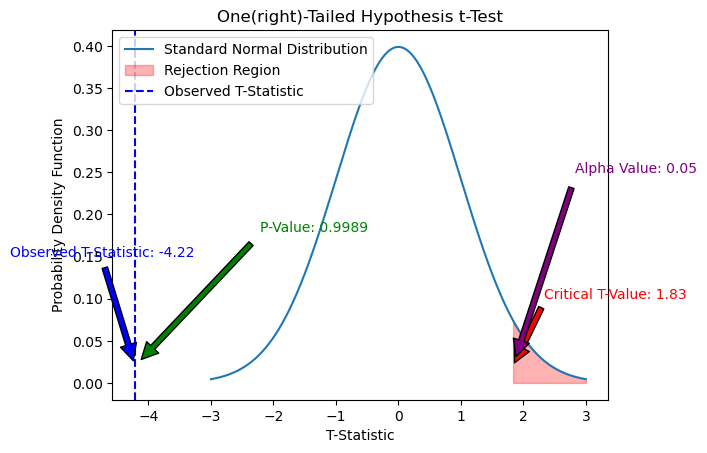

Fail to reject the null hypothesis: There is not enough evidence to conclude that the average lifespan is less than 2 hours.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Given data
sample_mean = 1.8
hypothesized_mean = 2
sample_std_dev = 0.15
sample_size = 10

# Calculate the T-Statistic
t_statistic = (sample_mean - hypothesized_mean) / (sample_std_dev / np.sqrt(sample_size))

# Determine Critical Value or P-Value
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha, df=sample_size - 1)
p_value = 1 - stats.t.cdf(t_statistic, df=sample_size - 1)

# Generate data for the standard normal distribution
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x)

# Plot the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

# Shade the rejection region
plt.fill_between(x, y, where=(x > t_critical), color='red', alpha=0.3, label='Rejection Region')

# Plot the observed t-statistic
plt.axvline(x=t_statistic, color='blue', linestyle='--', label='Observed T-Statistic')

# Add labels and title
plt.title('One(right)-Tailed Hypothesis t-Test')
plt.xlabel('T-Statistic')
plt.ylabel('Probability Density Function')

# Add annotations for z-score, critical score, p-value, and t-statistic
plt.annotate(f'Observed T-Statistic: {t_statistic:.2f}', xy=(t_statistic, 0.02), xytext=(t_statistic - 2, 0.15),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')
plt.annotate(f'Critical T-Value: {t_critical:.2f}', xy=(t_critical, 0.02), xytext=(t_critical + 0.5, 0.1),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.annotate(f'P-Value: {p_value:.4f}', xy=(t_statistic, 0.02), xytext=(t_statistic + 2, 0.18),
             arrowprops=dict(facecolor='green', shrink=0.05), color='green')
plt.annotate(f'Alpha Value: {alpha}', xy=(t_critical, 0.02), xytext=(t_critical + 1, 0.25),
             arrowprops=dict(facecolor='purple', shrink=0.05), color='purple')

# Display the legend
plt.legend()

# Display the plot
plt.show()


# Conclusion based on p-value and alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is enough evidence to suggest that the average lifespan is less than 2 hours.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the average lifespan is less than 2 hours.")